In [2]:
# paired t-test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

test for normality: ShapiroResult(statistic=0.9562923908233643, pvalue=0.7429129481315613)
do not reject the null


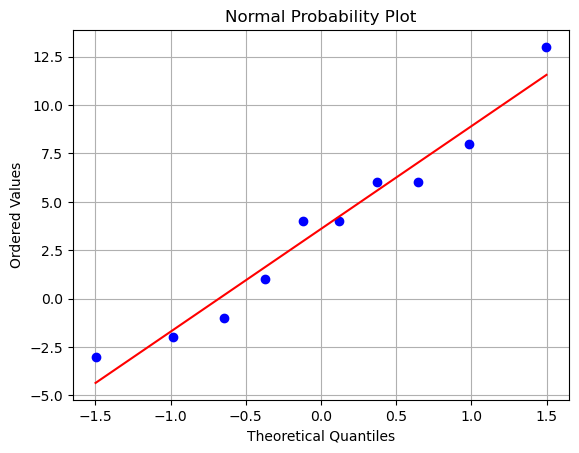

alpha: 0.05
sample size: 10
mean diff: 3.6
std of diff: 4.971027168615266
paired t-statistic: 2.290110110135922
DoF: 9
p-value: 0.047766050110303535
critical value: 2.262
p-value: 0.047766050110303535
ME: 3.555811558561561
CI: (0.04418844143843925, 7.155811558561561)


In [18]:
# Do the mean age of married men differ than married women
# sample size of 10 married couples
# the array provides the difference in ages
# two-tailed test

# Hypotheses:
# H0: μ1 = μ2 (the means are equal)
# H1: μ1 ≠ μ2 (the means are not equal, two-tailed test)

# Differences data
differences = np.array([6, -1, -3, 4, 6, -2, 1, 4, 13, 8])

## test for normality 

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(differences)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(differences, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

# define the threshold
alpha = 0.05
print(f'alpha: {alpha}')

# Sample size
n = len(differences)
print(f'sample size: {n}')

# mean difference
mean_diff = np.mean(differences)
print(f'mean diff: {mean_diff}')

# Standard deviation of differences
std_diff = np.std(differences, ddof=1)
print(f'std of diff: {std_diff}')

# t-statistic 
t_statistic = mean_diff / (std_diff / np.sqrt(n))
print(f'paired t-statistic: {t_statistic}')

# Degrees of freedom
df = n - 1
print(f'DoF: {df}')

# Determine critical t-value for 95% confidence level (two-tailed test)
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# p-value
# Multiplying by 2 accounts for both tails of the distribution
p_value = stats.t.sf(np.abs(t_statistic), df) * 2  # two-tailed test
print(f'p-value: {p_value}')


# Confidence interval calculation
confidence_level = 0.95
margin_of_error = t_critical * (std_diff / np.sqrt(n))
print(f'ME: {margin_of_error}')

# Lower and upper bounds of the confidence interval
confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)
print(f'CI: {confidence_interval}')

diff: [ 4 -1  1  5  3  0 -5 -6]
alpha: 0.1
sample size: 8
test for normality: ShapiroResult(statistic=0.932479739189148, pvalue=0.5389149785041809)
do not reject the null


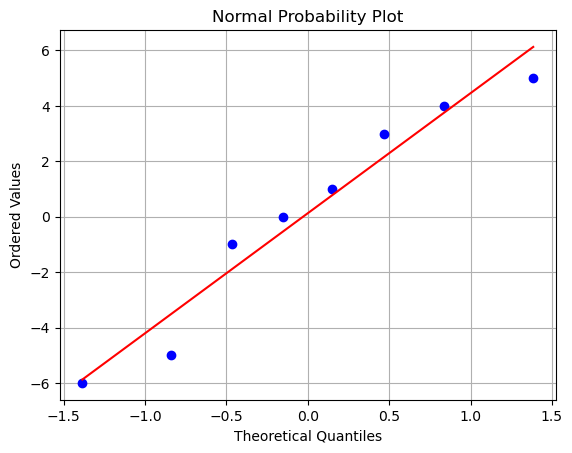

mean diff: 0.125
std of diff: 4.0155946010522525
paired t-statistic: 0.0880450906325624
DoF: 7
critical value: 1.415
p-value: 0.4661533601711949


In [3]:
# paired t-test (left-tailed)
# all you have to do is change the differences values in each array

# Data 
pop1 = np.array([7, 4, 9, 7, 19, 12, 13, 5])
pop2 = np.array([3, 5, 8, 2, 16, 12, 18, 11])

# Calculate the differences
differences = pop1 - pop2
differences_array = np.array(differences)
print(f'diff: {differences}')

# alpha
alpha = 0.10
print(f'alpha: {alpha}')

# Sample size
n = len(differences)
print(f'sample size: {n}')

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(differences)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(differences, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

# mean difference
mean_diff = np.mean(differences)
print(f'mean diff: {mean_diff}')

# Standard deviation of differences
std_diff = np.std(differences, ddof=1)
print(f'std of diff: {std_diff}')

# t-statistic 
t_statistic = mean_diff / (std_diff / np.sqrt(n))
print(f'paired t-statistic: {t_statistic}')

# Degrees of freedom
df = n - 1
print(f'DoF: {df}')

# Determine critical t-value for 95% confidence level (left-tailed test)
t_critical = stats.t.ppf(alpha, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# Conduct the right-tailed paired t-test
# stats.ttest_rel() by default returns a two-tailed p-value
t_statistic, p_value = stats.ttest_rel(pop1, pop2)

# Since we are performing a right-tailed test, we adjust the p-value
# If the t-statistic is positive, we divide by 2 for the right tail
if t_statistic > 0:
    p_value /= 2
    print(f'p-value: {p_value}')
else:
    p_value = 1 - p_value / 2
    print(f'p-value: {p_value}')

In [ ]:
# paired t-test (right-tailed)
# all you have to do is change the differences values in each array

# Data 
pop1 = np.array([15, 22, 15, 27, 24, 23, 8, 20, 2])
pop2 = np.array([18, 25, 17, 24, 30, 23, 10, 27, 3])

# Calculate the differences
differences = pop1 - pop2
differences_array = np.array(differences)
print(f'diff: {differences}')

# alpha
alpha = 0.10
print(f'alpha: {alpha}')

# Sample size
n = len(differences)
print(f'sample size: {n}')

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(differences)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(differences, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

# mean difference
mean_diff = np.mean(differences)
print(f'mean diff: {mean_diff}')

# Standard deviation of differences
std_diff = np.std(differences, ddof=1)
print(f'std of diff: {std_diff}')

# t-statistic 
t_statistic = mean_diff / (std_diff / np.sqrt(n))
print(f'paired t-statistic: {t_statistic}')

# Degrees of freedom
df = n - 1
print(f'DoF: {df}')

# Determine critical t-value for 95% confidence level (right-tailed test)
t_critical = stats.t.ppf(1 - alpha, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# Conduct the right-tailed paired t-test
# stats.ttest_rel() by default returns a two-tailed p-value
t_statistic, p_value = stats.ttest_rel(pop1, pop2)

# Since we are performing a right-tailed test, we adjust the p-value
# If the t-statistic is positive, we divide by 2 for the right tail
if t_statistic < 0:
    p_value /= 2
    print(f'p-value: {p_value}')
else:
    p_value = 1 - p_value / 2
    print(f'p-value: {p_value}')

In [ ]:
# paired-t-test (two-tailed)
# quick method

# Array of differences
differences = [49, -67, 8, 16, 6, 23, 28, 41, 14, 29, 56, 24, 75, 60, -48]

# Perform a paired t-test
# Pass the differences array and the value 0 
# Test if the average of these differences is non-zero
t_statistic, p_value = stats.ttest_1samp(differences, 0)

# Check significance at both the 5% and 1% levels
alpha_5_percent = 0.05
alpha_1_percent = 0.01

# Prepare the conclusion based on p-value
significance_5_percent = p_value < alpha_5_percent
significance_1_percent = p_value < alpha_1_percent

t_statistic, p_value, significance_5_percent, significance_1_percent
